In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
nx.__version__

'2.2'

In [3]:
!pip install --upgrade networkx==2.2

Requirement already up-to-date: networkx==2.2 in /Users/jiahuibi/anaconda/lib/python3.6/site-packages (2.2)
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Network Visualization

In [4]:
df = pd.read_csv('major_us_cities_edges.csv')
df.head()

,0,1,weight
0,"El Paso, TX","Albuquerque, NM",367.885844
1,"El Paso, TX","Mesa, AZ",536.256660
2,"El Paso, TX","Tucson, AZ",425.413867
3,"El Paso, TX","Phoenix, AZ",558.783570
4,"El Paso, TX","Colorado Springs, CO",797.751712


In [5]:
G = nx.from_pandas_edgelist(df, '0', '1', edge_attr='weight')

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


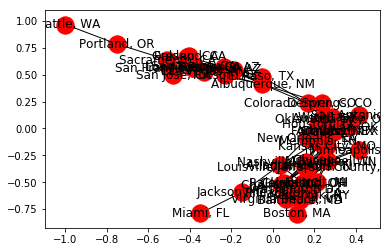

In [6]:
nx.draw_networkx(G)

In [7]:
dfn = pd.read_csv('major_us_cities_nodes.csv')
dfn.head()

,0,population,longitude,latitude
0,"El Paso, TX",674433,-106,31
1,"Long Beach, CA",469428,-118,33
2,"Dallas, TX",1257676,-96,32
3,"Oakland, CA",406253,-122,37
4,"Albuquerque, NM",556495,-106,35


**Set nodes attributes**

[G.add_nodes_from(nodes_for_adding, **att)](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_nodes_from.html#networkx.Graph.add_nodes_from) 

  
[nx.set_node_attributes(G, values, name=None)](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html)

In [8]:
nx.set_node_attributes(G, dfn.set_index('0').to_dict('index'))

In [9]:
G.nodes(data=True)

NodeDataView({'El Paso, TX': {'population': 674433, 'longitude': -106, 'latitude': 31}, 'Albuquerque, NM': {'population': 556495, 'longitude': -106, 'latitude': 35}, 'Mesa, AZ': {'population': 457587, 'longitude': -111, 'latitude': 33}, 'Tucson, AZ': {'population': 526116, 'longitude': -110, 'latitude': 32}, 'Phoenix, AZ': {'population': 1513367, 'longitude': -112, 'latitude': 33}, 'Colorado Springs, CO': {'population': 439886, 'longitude': -104, 'latitude': 38}, 'Long Beach, CA': {'population': 469428, 'longitude': -118, 'latitude': 33}, 'Oakland, CA': {'population': 406253, 'longitude': -122, 'latitude': 37}, 'Sacramento, CA': {'population': 479686, 'longitude': -121, 'latitude': 38}, 'San Jose, CA': {'population': 998537, 'longitude': -121, 'latitude': 37}, 'Fresno, CA': {'population': 509924, 'longitude': -119, 'latitude': 36}, 'San Diego, CA': {'population': 1355896, 'longitude': -117, 'latitude': 32}, 'San Francisco, CA': {'population': 837442, 'longitude': -122, 'latitude': 37},

In [10]:
dfn.set_index('0').head()

,population,longitude,latitude
0,,,
"El Paso, TX",674433,-106,31
"Long Beach, CA",469428,-118,33
"Dallas, TX",1257676,-96,32
"Oakland, CA",406253,-122,37
"Albuquerque, NM",556495,-106,35


[pandas.DataFrame.to_dict](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_dict.html)



In [11]:
dfn.set_index('0').to_dict('index')

{'Albuquerque, NM': {'latitude': 35, 'longitude': -106, 'population': 556495},
 'Arlington, TX': {'latitude': 32, 'longitude': -97, 'population': 379577},
 'Atlanta, GA': {'latitude': 33, 'longitude': -84, 'population': 447841},
 'Austin, TX': {'latitude': 30, 'longitude': -97, 'population': 885400},
 'Baltimore, MD': {'latitude': 39, 'longitude': -76, 'population': 622104},
 'Boston, MA': {'latitude': 42, 'longitude': -71, 'population': 645966},
 'Charlotte, NC': {'latitude': 35, 'longitude': -80, 'population': 792862},
 'Chicago, IL': {'latitude': 41, 'longitude': -87, 'population': 2718782},
 'Cleveland, OH': {'latitude': 41, 'longitude': -81, 'population': 390113},
 'Colorado Springs, CO': {'latitude': 38,
  'longitude': -104,
  'population': 439886},
 'Columbus, OH': {'latitude': 39, 'longitude': -82, 'population': 822553},
 'Dallas, TX': {'latitude': 32, 'longitude': -96, 'population': 1257676},
 'Denver, CO': {'latitude': 39, 'longitude': -104, 'population': 649495},
 'Detroit, 

In [12]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

<Figure size 720x648 with 0 Axes>

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


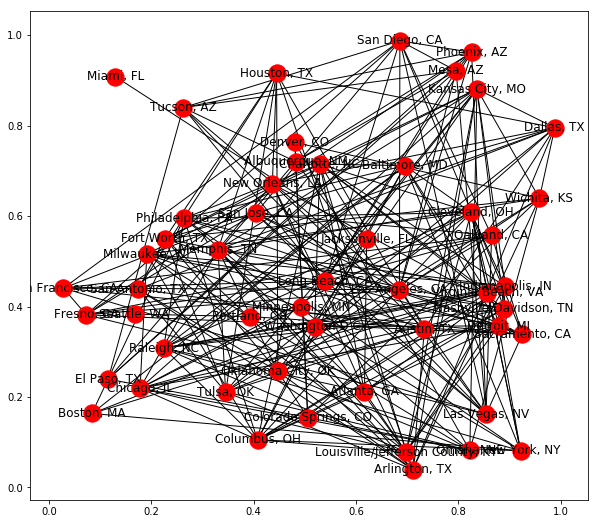

In [13]:
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)
plt.show()

<Figure size 720x648 with 0 Axes>

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


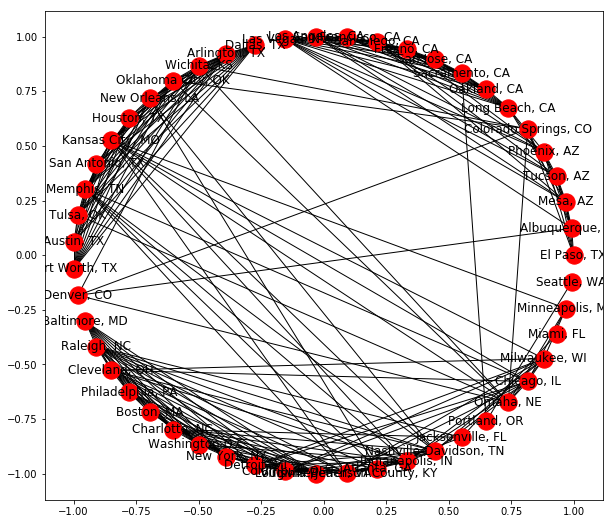

In [14]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

In [15]:
node_positions = {node[0]: (node[1]['longitude'], node[1]['latitude']) for node in G.nodes(data=True)}

In [16]:
for node in G.nodes(data=True):
    node[1]

{'latitude': 31, 'longitude': -106, 'population': 674433}

{'latitude': 35, 'longitude': -106, 'population': 556495}

{'latitude': 33, 'longitude': -111, 'population': 457587}

{'latitude': 32, 'longitude': -110, 'population': 526116}

{'latitude': 33, 'longitude': -112, 'population': 1513367}

{'latitude': 38, 'longitude': -104, 'population': 439886}

{'latitude': 33, 'longitude': -118, 'population': 469428}

{'latitude': 37, 'longitude': -122, 'population': 406253}

{'latitude': 38, 'longitude': -121, 'population': 479686}

{'latitude': 37, 'longitude': -121, 'population': 998537}

{'latitude': 36, 'longitude': -119, 'population': 509924}

{'latitude': 32, 'longitude': -117, 'population': 1355896}

{'latitude': 37, 'longitude': -122, 'population': 837442}

{'latitude': 34, 'longitude': -118, 'population': 3884307}

{'latitude': 36, 'longitude': -115, 'population': 603488}

{'latitude': 32, 'longitude': -96, 'population': 1257676}

{'latitude': 32, 'longitude': -97, 'population': 379577}

{'latitude': 37, 'longitude': -97, 'population': 386552}

{'latitude': 35, 'longitude': -97, 'population': 610613}

{'latitude': 29, 'longitude': -90, 'population': 378715}

{'latitude': 29, 'longitude': -95, 'population': 2195914}

{'latitude': 39, 'longitude': -94, 'population': 467007}

{'latitude': 29, 'longitude': -98, 'population': 1409019}

{'latitude': 35, 'longitude': -90, 'population': 653450}

{'latitude': 36, 'longitude': -95, 'population': 398121}

{'latitude': 30, 'longitude': -97, 'population': 885400}

{'latitude': 32, 'longitude': -97, 'population': 792727}

{'latitude': 39, 'longitude': -104, 'population': 649495}

{'latitude': 39, 'longitude': -76, 'population': 622104}

{'latitude': 35, 'longitude': -78, 'population': 431746}

{'latitude': 41, 'longitude': -81, 'population': 390113}

{'latitude': 39, 'longitude': -75, 'population': 1553165}

{'latitude': 42, 'longitude': -71, 'population': 645966}

{'latitude': 35, 'longitude': -80, 'population': 792862}

{'latitude': 38, 'longitude': -77, 'population': 646449}

{'latitude': 40, 'longitude': -74, 'population': 8405837}

{'latitude': 42, 'longitude': -83, 'population': 688701}

{'latitude': 39, 'longitude': -82, 'population': 822553}

{'latitude': 36, 'longitude': -75, 'population': 448479}

{'latitude': 38, 'longitude': -85, 'population': 609893}

{'latitude': 33, 'longitude': -84, 'population': 447841}

{'latitude': 39, 'longitude': -86, 'population': 843393}

{'latitude': 36, 'longitude': -86, 'population': 634464}

{'latitude': 30, 'longitude': -81, 'population': 842583}

{'latitude': 45, 'longitude': -122, 'population': 609456}

{'latitude': 41, 'longitude': -95, 'population': 434353}

{'latitude': 41, 'longitude': -87, 'population': 2718782}

{'latitude': 43, 'longitude': -87, 'population': 599164}

{'latitude': 25, 'longitude': -80, 'population': 417650}

{'latitude': 44, 'longitude': -93, 'population': 400070}

{'latitude': 47, 'longitude': -122, 'population': 652405}

In [17]:
node_positions

{'Albuquerque, NM': (-106, 35),
 'Arlington, TX': (-97, 32),
 'Atlanta, GA': (-84, 33),
 'Austin, TX': (-97, 30),
 'Baltimore, MD': (-76, 39),
 'Boston, MA': (-71, 42),
 'Charlotte, NC': (-80, 35),
 'Chicago, IL': (-87, 41),
 'Cleveland, OH': (-81, 41),
 'Colorado Springs, CO': (-104, 38),
 'Columbus, OH': (-82, 39),
 'Dallas, TX': (-96, 32),
 'Denver, CO': (-104, 39),
 'Detroit, MI': (-83, 42),
 'El Paso, TX': (-106, 31),
 'Fort Worth, TX': (-97, 32),
 'Fresno, CA': (-119, 36),
 'Houston, TX': (-95, 29),
 'Indianapolis, IN': (-86, 39),
 'Jacksonville, FL': (-81, 30),
 'Kansas City, MO': (-94, 39),
 'Las Vegas, NV': (-115, 36),
 'Long Beach, CA': (-118, 33),
 'Los Angeles, CA': (-118, 34),
 'Louisville/Jefferson County, KY': (-85, 38),
 'Memphis, TN': (-90, 35),
 'Mesa, AZ': (-111, 33),
 'Miami, FL': (-80, 25),
 'Milwaukee, WI': (-87, 43),
 'Minneapolis, MN': (-93, 44),
 'Nashville-Davidson, TN': (-86, 36),
 'New Orleans, LA': (-90, 29),
 'New York, NY': (-74, 40),
 'Oakland, CA': (-12

<Figure size 1152x648 with 0 Axes>

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


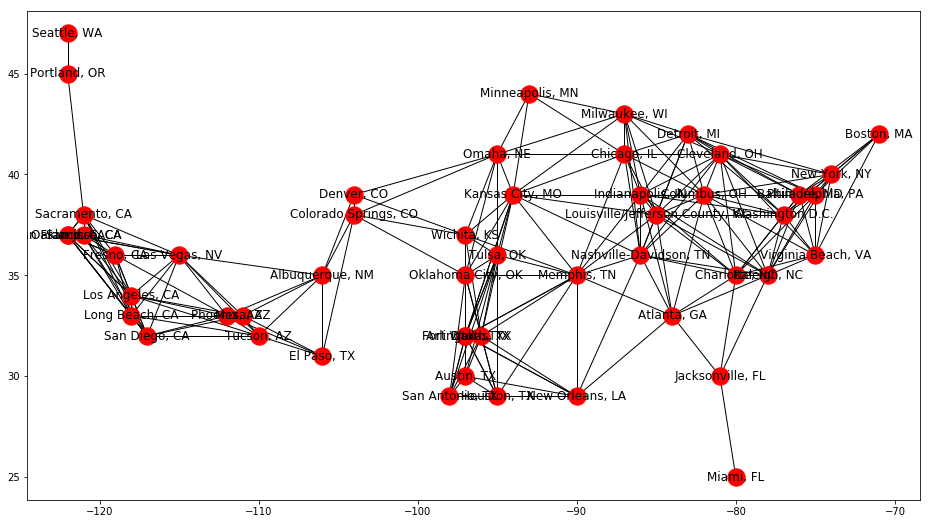

In [18]:
plt.figure(figsize=(16,9))
nx.draw_networkx(G, node_positions)
plt.show()

<Figure size 720x504 with 0 Axes>

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(-124.56707218537925,
 -68.43292781462074,
 23.874965101856333,
 48.12503489814366)

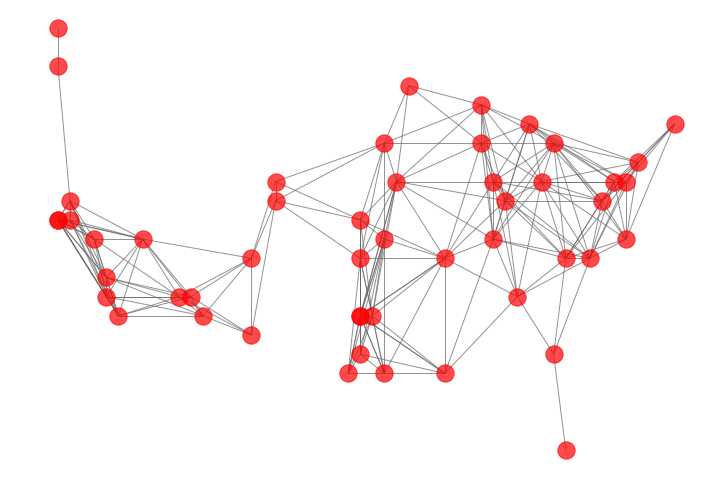

In [19]:
plt.figure(figsize=(10,7))
nx.draw_networkx(G, node_positions, alpha=0.7, with_labels=False, edge_color='.4');

plt.axis('off');
plt.tight_layout();#Automatically adjust subplot parameters to give specified padding.
plt.show()

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


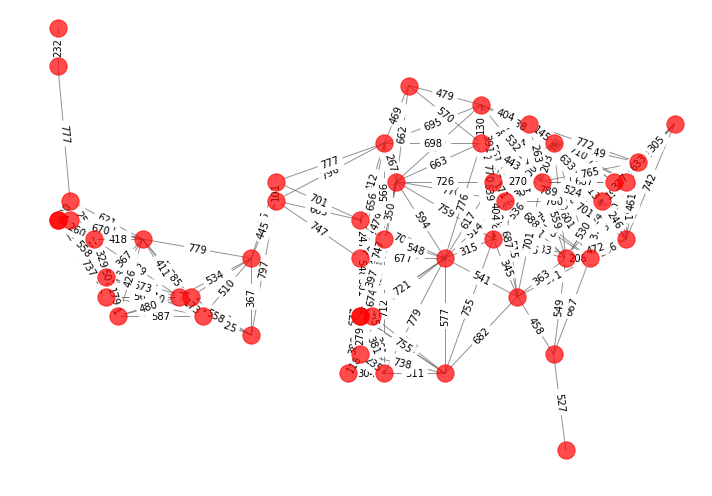

In [20]:
## Draw graph with edge label
plt.figure(figsize=(10,7))
nx.draw_networkx(G, node_positions, alpha=0.7, with_labels=False, edge_color='.4');

edge_labels = dict([((u,v,), int(d['weight'])) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, node_positions,edge_labels=edge_labels);

plt.axis('off')
plt.tight_layout();

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


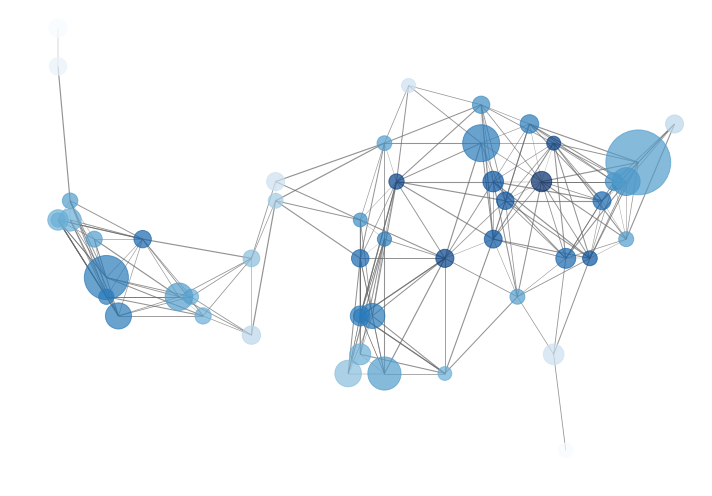

In [21]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, node_positions, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


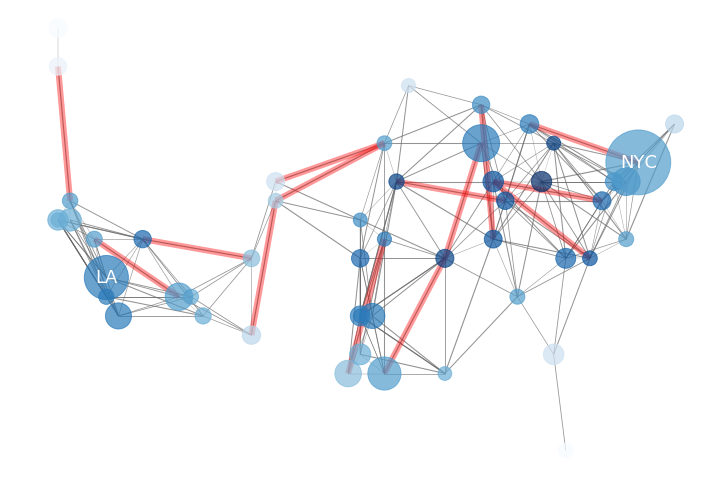

In [22]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

nx.draw_networkx(G, node_positions, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, node_positions, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)
#Label Specific Nodes
nx.draw_networkx_labels(G, node_positions, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();

In [23]:
edgelist=[('A', 'B', 6, 'family', 'orange'),
 ('C', 'B', 13, 'friend', 'blue'),
 ('C', 'E', 25, 'neighbor', 'purple'),
 ('C', 'F', 21, 'coworker', 'red'),
 ('E', 'H', 9, 'coworker', 'red'),
 ('D', 'E', 2, 'coworker', 'red'),
 ('I', 'E', 10, 'coworker', 'red'),
 ('I', 'J', 3, 'coworker', 'red'),
 ('J', 'E', 15, 'family', 'orange'),
 ('G', 'F', 9, 'friend', 'blue')]

In [24]:
edgedf = pd.DataFrame(edgelist,columns=['source','target','weight','relation','color'])
edgedf

,source,target,weight,relation,color
0,A,B,6,family,orange
1,C,B,13,friend,blue
2,C,E,25,neighbor,purple
3,C,F,21,coworker,red
4,E,H,9,coworker,red
5,D,E,2,coworker,red
6,I,E,10,coworker,red
7,I,J,3,coworker,red
8,J,E,15,family,orange
9,G,F,9,friend,blue


In [25]:
G2=nx.from_pandas_edgelist(edgedf,'source','target',
                           edge_attr=['weight','relation','color'],create_using=nx.DiGraph)

In [26]:
edge_colors = [e[2]['color'] for e in G2.edges(data=True)]

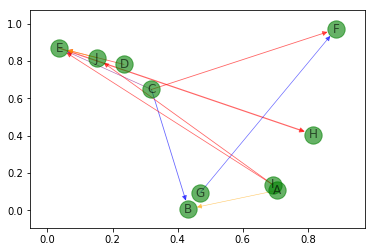

In [27]:

nx.draw_networkx(G2,nx.random_layout(G2),alpha=0.6, with_labels=True, width=edge_width, edge_color= edge_colors,node_color='green')

## Bipartite Network

<img src='https://github.com/christine62/python-tutorial/blob/master/image/network3.1.png?raw=true' width=30%>

In [28]:
from networkx.algorithms import bipartite

In [29]:
B=nx.Graph()
B.add_nodes_from(['A','B','C','D','E'],bipartite=0)
B.add_nodes_from([1,2,3,4],bipartite=1)
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)])


In [30]:
B.nodes(data=True)

NodeDataView({'A': {'bipartite': 0}, 'B': {'bipartite': 0}, 'C': {'bipartite': 0}, 'D': {'bipartite': 0}, 'E': {'bipartite': 0}, 1: {'bipartite': 1}, 2: {'bipartite': 1}, 3: {'bipartite': 1}, 4: {'bipartite': 1}})

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


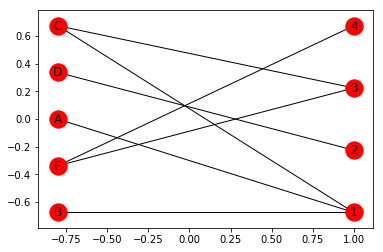

In [31]:
X = set(['A','B','C','D','E'])
pos = nx.bipartite_layout(B,X)
nx.draw_networkx(B,pos)
plt.show()

In [32]:
bipartite.is_bipartite(B)

True

In [33]:
B.add_edge('A','B')
bipartite.is_bipartite(B)

False

In [34]:
B.remove_edge('A','B')

In [35]:

bipartite.is_bipartite_node_set(B,X)

True

### Projected Graph

<img src='https://github.com/christine62/python-tutorial/blob/master/image/network3.3.png?raw=true' width=40%>

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


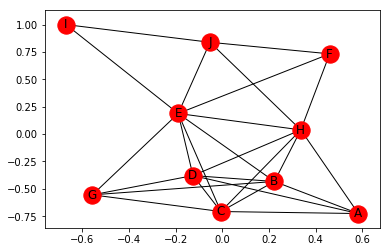

In [36]:
B = nx.Graph()
B.add_edges_from([('A',1),('B',1),('C',1),('D',1),
                  ('H',1),('B',2),('C',2),('D',2),
                  ('E',2),('G',2),('E',3),('F',3),
                  ('H',3),('J',3),('E',4),('I',4),('J',4)])
X = nx.bipartite.sets(B)[0]
#X = set(['A','B','C','D','E','F','G','H','J','I'])
P = bipartite.projected_graph(B,X)
nx.draw_networkx(P)
plt.show()

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


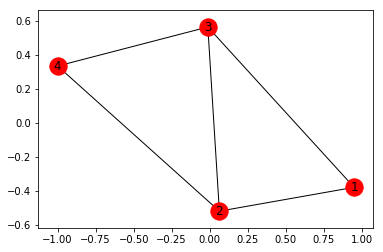

In [37]:
Y = nx.bipartite.sets(B)[1]
WP = bipartite.weighted_projected_graph(B,Y)
nx.draw_networkx(WP)
plt.show()

In [38]:
WP.edges(data=True)

EdgeDataView([(1, 2, {'weight': 3}), (1, 3, {'weight': 1}), (2, 3, {'weight': 1}), (2, 4, {'weight': 1}), (3, 4, {'weight': 2})])